<a href="https://colab.research.google.com/github/princ1211/StockVal-Predictor/blob/main/Stock_value_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential 
from keras.layers import Dense, LSTM
import math
import pandas_datareader as web
  

In [2]:
pip install yfinance

     |████████████████████████████████| 6.3 MB 12.9 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=e30433ad94c6d6ce6119e01b12a5ee3b14e47032a04f3d621ff0a58f504882a0
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [3]:
import yfinance as yf

In [4]:
 df = yf.download('AAPL','2012-01-01','2020-08-01')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.610315,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.678085,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.818838,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.952841,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.932299,394024400
...,...,...,...,...,...,...
2020-07-27,93.709999,94.904999,93.480003,94.809998,94.034538,121214000
2020-07-28,94.367500,94.550003,93.247498,93.252502,92.489784,103625600
2020-07-29,93.750000,95.230003,93.712502,95.040001,94.262657,90329200


In [5]:
df.shape

(2159, 6)

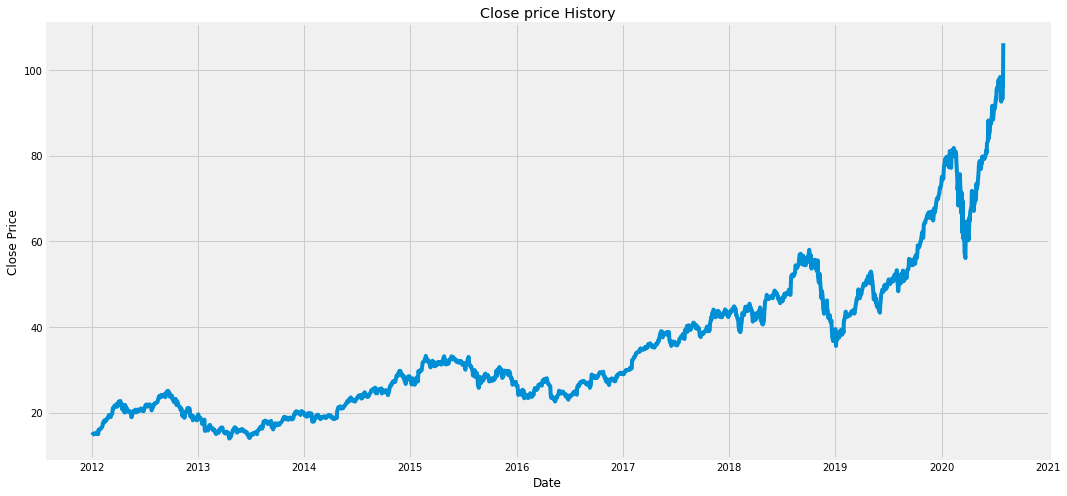

In [6]:
plt.figure(figsize=(16,8))
plt.title("Close price History")
plt.plot(df['Close'])
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()

In [7]:
data=df.filter(["Close"])
dataset= data.values
training_data=math.ceil(len(dataset)* 0.8)
training_data


1728

In [8]:
scaler= MinMaxScaler(feature_range=(0,1))
scaled_data= scaler.fit_transform(dataset)
scaled_data

array([[0.00800851],
       [0.00886352],
       [0.01063932],
       ...,
       [0.87845632],
       [0.89091402],
       [1.        ]])

In [9]:
train_data= scaled_data[0:training_data, :]
x_train=[]
y_train=[]
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0 ])
  y_train.append(train_data[i,0])
  if i<=60:
    print(x_train)
    print(y_train)
    print()


[array([0.00800851, 0.00886352, 0.01063932, 0.01233001, 0.0120708 ,
       0.01265499, 0.01238804, 0.01193925, 0.01132797, 0.01321984,
       0.01492601, 0.01439984, 0.01151754, 0.0142683 , 0.01156011,
       0.02171583, 0.02093046, 0.0219557 , 0.02417255, 0.02551503,
       0.02540284, 0.02498888, 0.02675307, 0.02841279, 0.03029307,
       0.03333011, 0.03970984, 0.03980655, 0.04335816, 0.04601218,
       0.04145083, 0.04320727, 0.04317245, 0.0480975 , 0.04739723,
       0.04869328, 0.05102233, 0.05231841, 0.05605184, 0.05877163,
       0.05955701, 0.0598317 , 0.05518136, 0.05405938, 0.05422575,
       0.05859755, 0.05982784, 0.06247027, 0.0686991 , 0.07700938,
       0.0754541 , 0.07545796, 0.08146629, 0.08334656, 0.08200792,
       0.08078538, 0.07951253, 0.08374116, 0.08664281, 0.08785763])]
[0.08485539492813565]



In [10]:
x_train, y_train= np.array(x_train), np.array(y_train)
x_train.shape

(1668, 60)

In [11]:
x_train=np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1668, 60, 1)

In [12]:
model=Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [13]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [14]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

1668/1668 [==============================] - 52s 27ms/step - loss: 4.4544e-04


In [15]:
test_data= scaled_data[training_data-60:, :]
x_test=[]
y_test=dataset[training_data:,: ]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0 ])
  

In [16]:
x_test= np.array(x_test)


In [17]:
x_test=np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [18]:
prediction= model.predict(x_test)
prediction = scaler.inverse_transform(prediction)


In [19]:
rsme=np.sqrt(np.mean((prediction-y_test)**2))
rsme

3.370711330971057

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


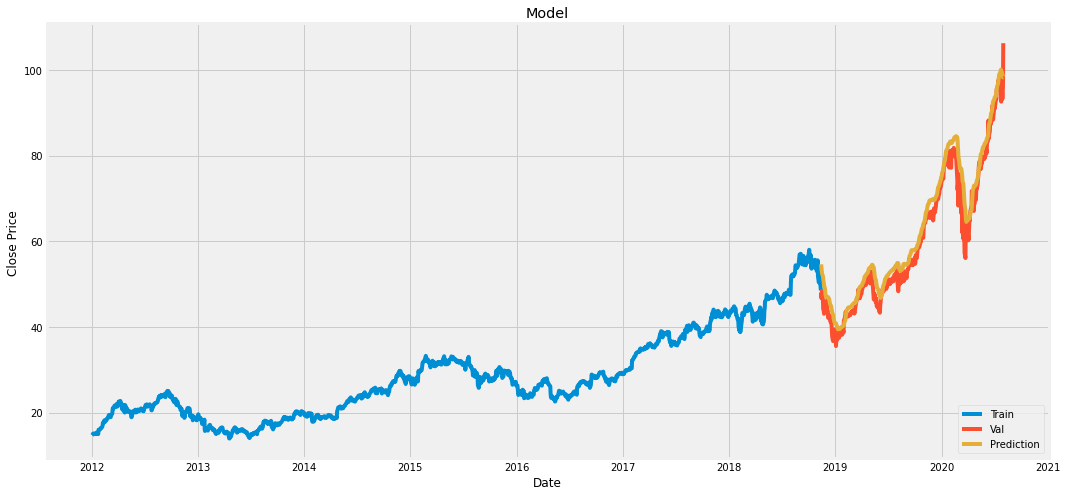

In [20]:
train= data[:training_data]
valid=data[ training_data:]
valid["Prediction"]=prediction
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel("Date", )
plt.ylabel("Close Price ")
plt.plot(train["Close"])
plt.plot(valid[["Close", "Prediction"]])
plt.legend(["Train", "Val", 'Prediction'], loc='lower right')
plt.show()


In [21]:
valid

,Close,Prediction
Date,,
2018-11-13,48.057499,54.617908
2018-11-14,46.700001,53.952286
2018-11-15,47.852501,53.139778
2018-11-16,48.382500,52.442081
2018-11-19,46.465000,51.925091
...,...,...
2020-07-27,94.809998,99.270279
2020-07-28,93.252502,98.906075
2020-07-29,95.040001,98.491920


In [22]:
df = yf.download('AAPL','2012-01-01','2020-08-01')
new_df=df.filter(['Close'])
last60= new_df[-60:].values
last60_scaled=scaler.transform(last60)
X_test=[]
X_test.append(last60_scaled)
X_test=np.array(X_test)
X_test= np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))
pred_price= model.predict(X_test)
pred_price= scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%***********************]  1 of 1 completed
[[99.44076]]


In [26]:
df2 = yf.download('AAPL','2020-07-30','2020-08-01')
print(df2['Close'])

[*********************100%***********************]  1 of 1 completed
Date
2020-07-30     96.190002
2020-07-31    106.260002
Name: Close, dtype: float64
